In [13]:
import numpy as np
import scipy
import random as rand
import matplotlib.pyplot as plt
from copy import copy

**Project by Andrew East**

**Assumptions:**
First we will have one impactor size of 10km. This will create a crater that has a radius of 30km. Every impact is 1000 years apart and the surface is saturated when any crater ends up covering another crater. I will no longer classify a crater to be on the surface when another crater lands within 5km of the center of the crater thus covering the majority of the initial crater.

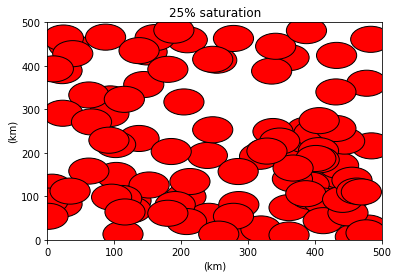

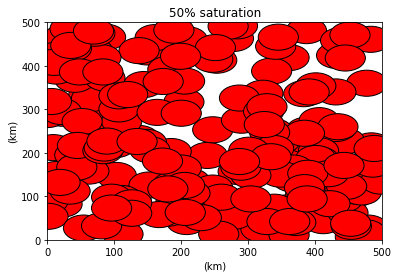

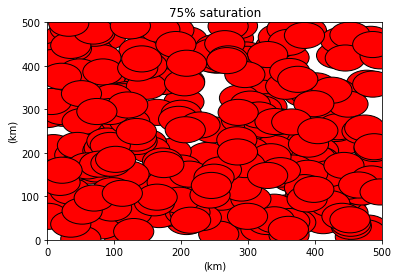

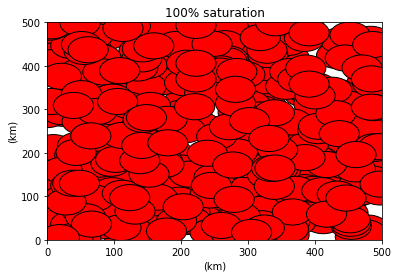

In [41]:
impactors_radius = 10
unsaturated = True
centers = []
impactors = []        #declare variables for use later in the code
crater_radius = 30
top_craters = []
total_craters = 0
craters_at_time = []
times = []
time = 0
#use while loop with condition for saturation
while unsaturated:
    x = rand.randrange(500) #pick a random x coordinate for the center of the crater
    y = rand.randrange(500) #pick a random y coordinate for the center of the crater
    center = (x,y)
    #write if statement to check if the center of the crater is within 5km of other impactors
    #if within this range we will subtract the crater underneath from the 
    count=0
    for i in top_craters:
        if center[0] > i[0]-5 and center[0] < i[0]+5:
            top_craters.remove(i)
            total_craters -= 1
        elif center[1] > i[1]-5 and center[1] < i[1]+5:
            top_craters.remove(i)
            total_craters -= 1
        count +=1
    
    top_craters.append(center) #append the crater to the top crater for later plot of visible craters vs time
    total_craters += 1
    craters_at_time.append(total_craters)    
    
    if center in centers:   # if the crater center already exists we will skip adding it to the list of impactors but still increment the time
        time += 1000
        times.append(time)
        continue
    else:
        centers.append(center) # add the new crater to our list
        impact = plt.Circle(center, crater_radius, fc ='r', fill = True, ec = 'black') # plot the new crater
        impactors.append(impact)
        time += 1000          #increment the time for 1000 years as that is our impact frequency
        times.append(time)
        if time == 400000:    #this checks to see if the surface is saturated by extending to 300000 years or 300 impacts
            unsaturated = False #change our unsaturated flag in order to end the while loop



fig1 = plt.figure()
ax1 = fig1.add_subplot(111) # create the figure and axis subplot
ax1.set_title("25% saturation")
ax1.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax1.set_ylim((0, 500))
ax1.set_xlabel("(km)") # set both the x and y labels for the graph
ax1.set_ylabel("(km)")
quarter = int(len(impactors)/4) #calculate the length of the list at 25%
for i in range(quarter):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax1.add_patch(new_i) # add the circles from the copied patches

fig2 = plt.figure()
ax2 = fig2.add_subplot(111) # create the figure and axis subplot
ax2.set_title("50% saturation")
ax2.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax2.set_ylim((0, 500))
ax2.set_xlabel("(km)") # set both the x and y labels for the graph
ax2.set_ylabel("(km)")
half = int(len(impactors)/2) #calculate the length of the list at 50%
for i in range(half):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax2.add_patch(new_i) # add the circles from the copied patches
    
fig3 = plt.figure()
ax3 = fig3.add_subplot(111) # create the figure and axis subplot
ax3.set_title("75% saturation")
ax3.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax3.set_ylim((0, 500))
ax3.set_xlabel("(km)") # set both the x and y labels for the graph
ax3.set_ylabel("(km)")
three_quarter = int(len(impactors)*(3/4)) #calculate the length of the list at 75%
for i in range(three_quarter):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax3.add_patch(new_i) # add the circles from the copied patches

fig4 = plt.figure()
ax4 = fig4.add_subplot(111) # create the figure and axis subplot
ax4.set_title("100% saturation")
ax4.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax4.set_ylim((0, 500))
ax4.set_xlabel("(km)") # set both the x and y labels for the graph
ax4.set_ylabel("(km)")
full = int(len(impactors)) #calculate the length of the list at 100%
for i in range(full):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax4.add_patch(new_i) # add the circles from the copied patches

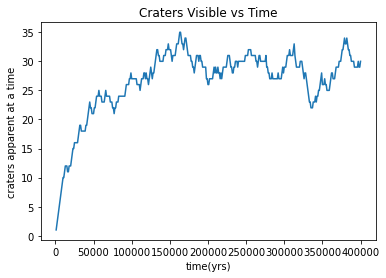

In [42]:
plt.plot(times, craters_at_time)
plt.ylabel("craters apparent at a time")
plt.xlabel("time(yrs)")
plt.title("Craters Visible vs Time")
plt.show()

**Analysis**

As we can see from the craters vs time graph after the initial jump in craters to about 10000 yrs we seem to bounce back and fourth at the point of saturation. This occurs as less space is available for new craters to emerge without erasing older craters. My simulation goes past the point of saturation that I would stop at ocasionally but in order to allow for the randomness of my center placement, I set a specific amount of time for the simulation to run. for the example that I attatched in the markdown box we can see that the point of saturation seems to have been reached at around 250000 years as each crater added seems to only remove more.
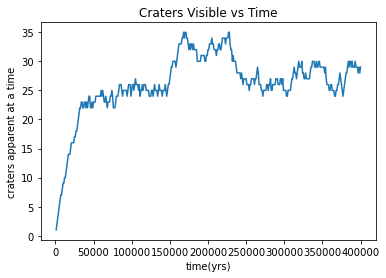

**Part 2**

For the assumption that I will change I have opted to make the impactors strike at a random time that is between 1 and a thousand years. The simulation runs for 200000 yrs now in order to better show the saturation point. All other assumptions are still the same.

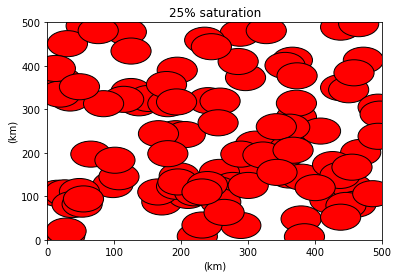

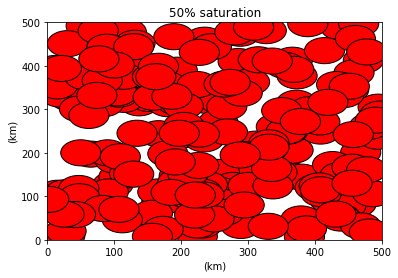

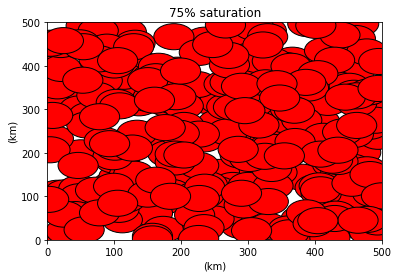

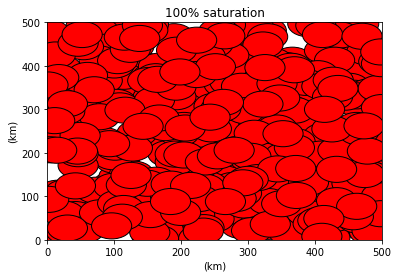

In [92]:
prob = [.5,.25,.12,.7,.6]  
impactors_radius = 10
unsaturated = True
centers = []
impactors = []        #declare variables for use later in the code
crater_radius = 30
top_craters = []
total_craters = 0
craters_at_time = []
times = []
time = 0
#use while loop with condition for saturation
while unsaturated:
    x = rand.randrange(500) #pick a random x coordinate for the center of the crater
    y = rand.randrange(500) #pick a random y coordinate for the center of the crater
    new_time = rand.randint(1,1000) #pick the random time step for when the crater impacts with a given probability distribution
    center = (x,y)
    #write if statement to check if the center of the crater is within 5km of other impactors
    #if within this range we will subtract the crater underneath from the 
    count=0
    for i in top_craters:
        if center[0] > i[0]-5 and center[0] < i[0]+5:
            top_craters.remove(i)
            total_craters -= 1
        elif center[1] > i[1]-5 and center[1] < i[1]+5:
            top_craters.remove(i)
            total_craters -= 1
        count +=1
    
    top_craters.append(center) #append the crater to the top crater for later plot of visible craters vs time
    total_craters += 1
    craters_at_time.append(total_craters)    
    
    if center in centers:   # if the crater center already exists we will skip adding it to the list of impactors but still increment the time
        time += new_time
        times.append(time)
        continue
    else:
        centers.append(center) # add the new crater to our list
        impact = plt.Circle(center, crater_radius, fc ='r', fill = True, ec = 'black') # plot the new crater
        impactors.append(impact)
        time += new_time          #increment the time for 1000 years as that is our impact frequency
        times.append(time)
        if time >= 200000:    #this checks to see if the surface is saturated by extending to 300000 years or 300 impacts
            unsaturated = False #change our unsaturated flag in order to end the while loop



fig1 = plt.figure()
ax1 = fig1.add_subplot(111) # create the figure and axis subplot
ax1.set_title("25% saturation")
ax1.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax1.set_ylim((0, 500))
ax1.set_xlabel("(km)") # set both the x and y labels for the graph
ax1.set_ylabel("(km)")
quarter = int(len(impactors)/4) #calculate the length of the list at 25%
for i in range(quarter):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax1.add_patch(new_i) # add the circles from the copied patches

fig2 = plt.figure()
ax2 = fig2.add_subplot(111) # create the figure and axis subplot
ax2.set_title("50% saturation")
ax2.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax2.set_ylim((0, 500))
ax2.set_xlabel("(km)") # set both the x and y labels for the graph
ax2.set_ylabel("(km)")
half = int(len(impactors)/2) #calculate the length of the list at 50%
for i in range(half):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax2.add_patch(new_i) # add the circles from the copied patches
    
fig3 = plt.figure()
ax3 = fig3.add_subplot(111) # create the figure and axis subplot
ax3.set_title("75% saturation")
ax3.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax3.set_ylim((0, 500))
ax3.set_xlabel("(km)") # set both the x and y labels for the graph
ax3.set_ylabel("(km)")
three_quarter = int(len(impactors)*(3/4)) #calculate the length of the list at 75%
for i in range(three_quarter):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax3.add_patch(new_i) # add the circles from the copied patches

fig4 = plt.figure()
ax4 = fig4.add_subplot(111) # create the figure and axis subplot
ax4.set_title("100% saturation")
ax4.set_xlim((0, 500)) # set the limits for both axis to create a 500x500 km box
ax4.set_ylim((0, 500))
ax4.set_xlabel("(km)") # set both the x and y labels for the graph
ax4.set_ylabel("(km)")
full = int(len(impactors)) #calculate the length of the list at 100%
for i in range(full):
    new_i=copy(impactors[i]) # use the imported copy function in order to not use a single artist to make multiple figures
    ax4.add_patch(new_i) # add the circles from the copied patches

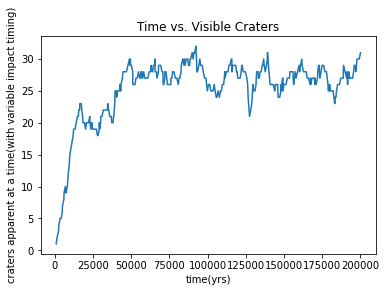

In [96]:
plt.plot(times, craters_at_time)
plt.title("Time vs. Visible Craters")
plt.ylabel("craters apparent at a time(with variable impact timing)")
plt.xlabel("time(yrs)")
plt.show()

**Analysis/Results**

By having a random time for each new imapct I was able to notice that the time to saturation is much shorter because the impacts can occur is a shorter time step over the thousand year guarantee. This also meant that we end up with more impacts overall but still the same amount of craters visible on top.